In [1]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [2]:
## For data
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import datetime

#from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import r2_score

## For plotting 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import ArmaProcess


from sklearn.model_selection import train_test_split
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.mx.trainer import Trainer
import mxnet as mx

In [3]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = False

In [5]:
pd.__version__

'1.4.2'

In [6]:
df = pd.read_csv('Data/co2_emission.csv')
df.head()

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO2 emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [8]:
df.describe()

,Year,Annual CO2 emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [9]:
df.shape

(20853, 4)

In [10]:
max(df['Annual CO2 emissions (tonnes )'])

36153261645.0

In [11]:
min(df['Annual CO2 emissions (tonnes )'])

-625522256.7

In [12]:
date_formater = mdates.DateFormatter('%Y')

In [13]:
df = df.set_index(df['Year'])


In [14]:
df[df["Code"]=="FRA"]["Year"]

Year
1802    1802
1804    1804
1810    1810
1811    1811
1812    1812
        ... 
2013    2013
2014    2014
2015    2015
2016    2016
2017    2017
Name: Year, Length: 210, dtype: int64

# VISUALISATION

In [15]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = False

In [16]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = False

In [17]:
df['Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM',
       'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE',
       'OWID_CZS', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA',
       'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC',
       'GRL', 'GRD', 'GLP', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MT

In [18]:
df['Year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758,
       1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769,
       1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780,
       1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791,
       1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802,
       1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813,
       1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824,
       1825, 1826, 1827, 1828, 1829, 1830, 1831, 18

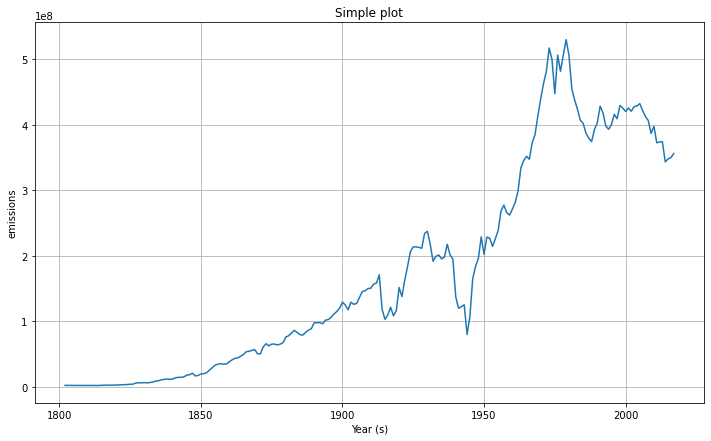

In [19]:
# Data for plotting
t = df['Annual CO2 emissions (tonnes )' ]
s = df[ df['Code']=='FRA' ]
u=s['Annual CO2 emissions (tonnes )' ]

r=s['Year']
fig, ax = plt.subplots()
ax.plot(r, u)

ax.set(xlabel='Year (s)', ylabel='emissions', title='Simple plot')
ax.grid()

plt.show()

# Stationnarité

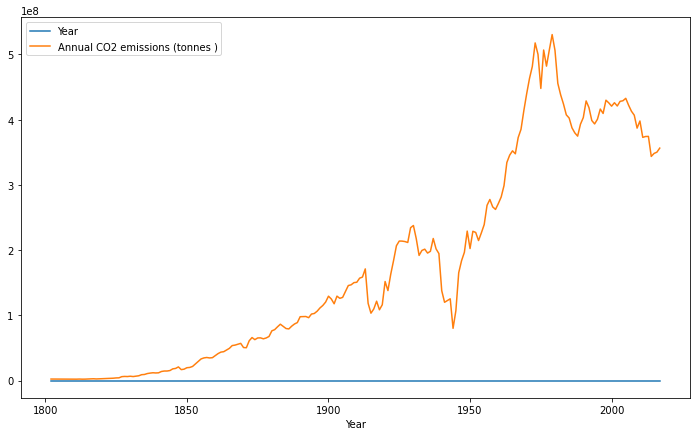

In [20]:
df[df.Code== 'FRA'].plot()
plt.show()

In [21]:
X = df[df.Code == 'FRA'][:10000].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]

Y1=[]
len(X1)
for i in range(105):
    Y1.append(X1[i][3])

Y2=[]
len(X2)
for i in range(105):
    Y2.append(X2[i][3])

mean1, mean2 = np.array(Y1).mean(), np.array(Y2).mean()
var1, var2 =  np.array(Y1).var(), np.array(Y2).var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=51247321.142857, mean2=308448635.729524
variance1=2177832341968525.000000, variance2=15052033481057680.000000


In [22]:
df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO2 emissions (tonnes )'], dtype='object')

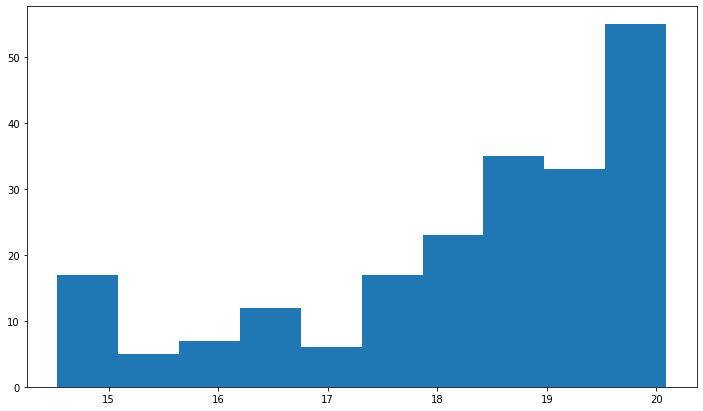

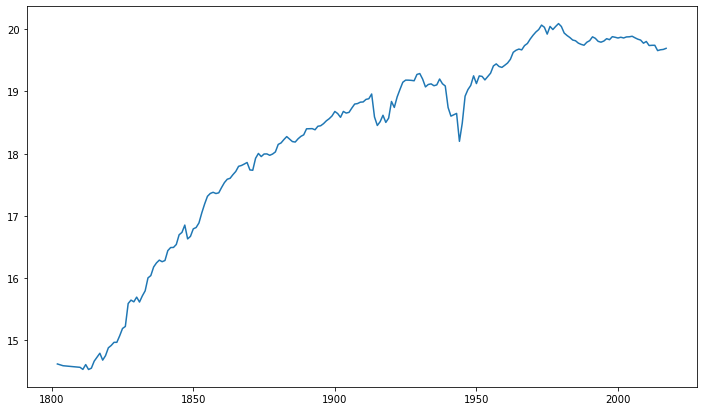

In [23]:
X = df[df.Code == 'FRA']
mdata = X['Annual CO2 emissions (tonnes )']
X = np.log(mdata)

plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

## Test de ad Fuller

In [24]:
#X = df[df.Code == 'FRA'][:10000].values
result = adfuller(mdata)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.693307
p-value: 0.848475
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574


p-value > 0.05 => H0 ne peut être rejeter. On peut admettre alors que la série est non-stationnaire.

**Differencing**

In [26]:
df_diff = df[df.Code == 'FRA']['Annual CO2 emissions (tonnes )'].diff().dropna()

In [27]:
X=df_diff[:10000] .values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.010052
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574


P-value = 0 => la série temporelle est stationnaire.

<AxesSubplot:xlabel='Year'>

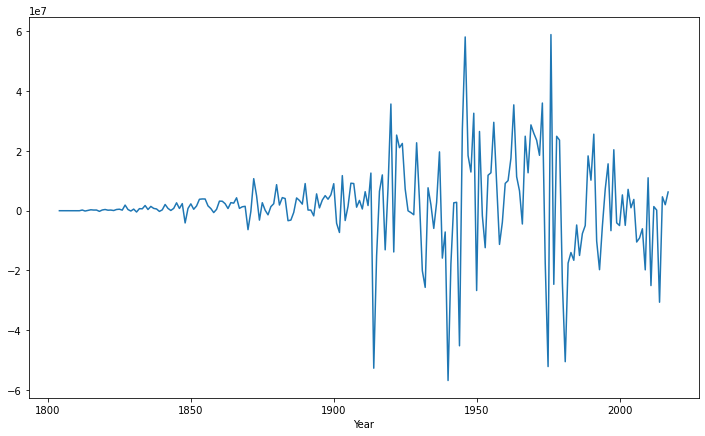

In [28]:
df_diff[:10000].plot()

In [ ]:
#df = df.drop(['Year'], axis=1)

In [29]:
df.head()

,Entity,Code,Year,Annual CO2 emissions (tonnes )
Year,,,,
1949,Afghanistan,AFG,1949,14656.0
1950,Afghanistan,AFG,1950,84272.0
1951,Afghanistan,AFG,1951,91600.0
1952,Afghanistan,AFG,1952,91600.0
1953,Afghanistan,AFG,1953,106256.0


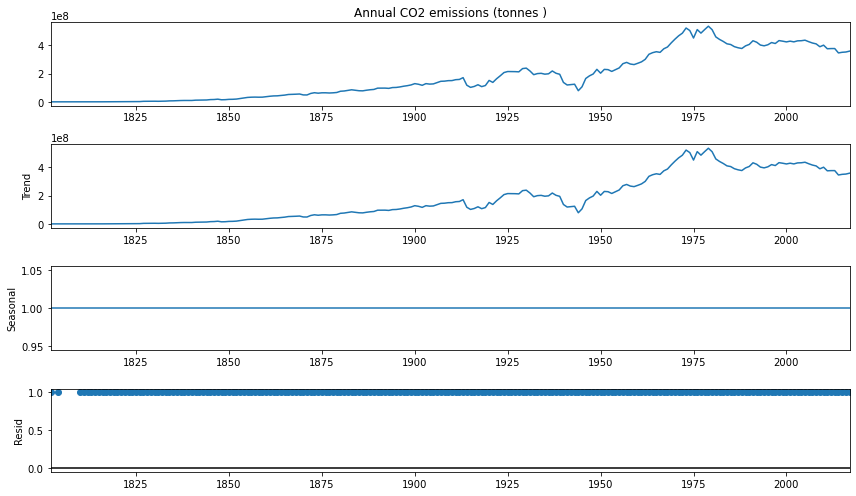

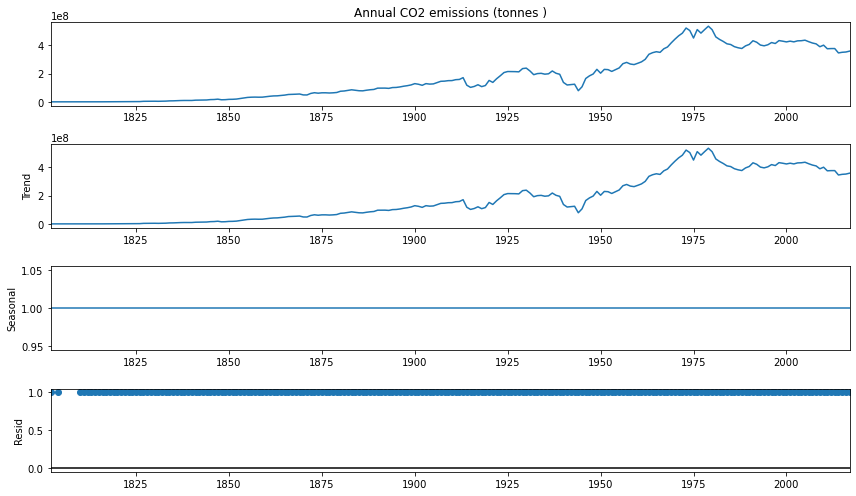

In [30]:
decomposition = seasonal_decompose(df[df.Code == 'FRA']['Annual CO2 emissions (tonnes )'], model='multiplicative', period=1)
seasonal_decompose(df[df.Code == 'FRA']['Annual CO2 emissions (tonnes )'], model='multiplicative',  period=1).plot()

# ARIMA

### Autocorrélation

C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


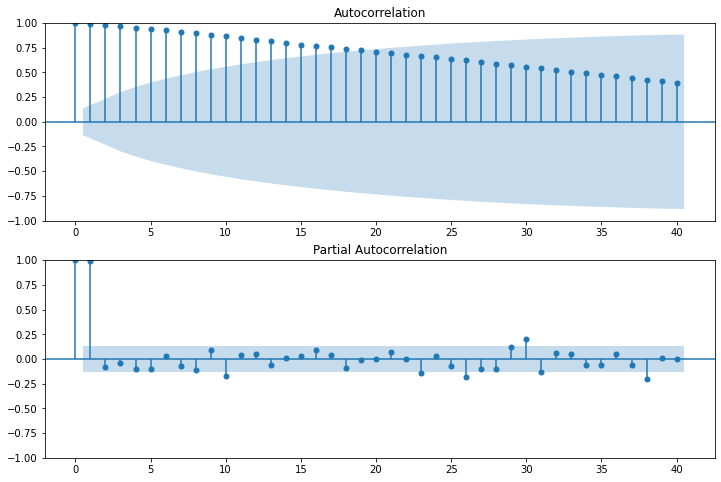

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df[df.Code == 'FRA']['Annual CO2 emissions (tonnes )'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df[df.Code == 'FRA']['Annual CO2 emissions (tonnes )'].iloc[1:],lags=40,ax=ax2)

In [32]:
#dta = sm.datasets.sunspots.load_pandas().data
#dta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
#dta = dta.drop('YEAR',1)

#arma_mod30 = sm.tsa.ARMA(dta, (3, 0)).fit(disp=False)
#predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)

#ou

mod = ARIMA(u, order=(1, 1,0))
res = mod.fit()


C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [33]:
print(res.params)
print(res.summary())

ar.L1     1.087840e-01
sigma2    2.300949e+14
dtype: float64
                                     SARIMAX Results                                      
Dep. Variable:     Annual CO2 emissions (tonnes )   No. Observations:                  210
Model:                             ARIMA(1, 1, 0)   Log Likelihood               -3751.822
Date:                            Wed, 01 Jun 2022   AIC                           7507.645
Time:                                    21:22:56   BIC                           7514.330
Sample:                                         0   HQIC                          7510.348
                                            - 210                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1088      0.041      2.642      0.00

**Analyse résiduel**

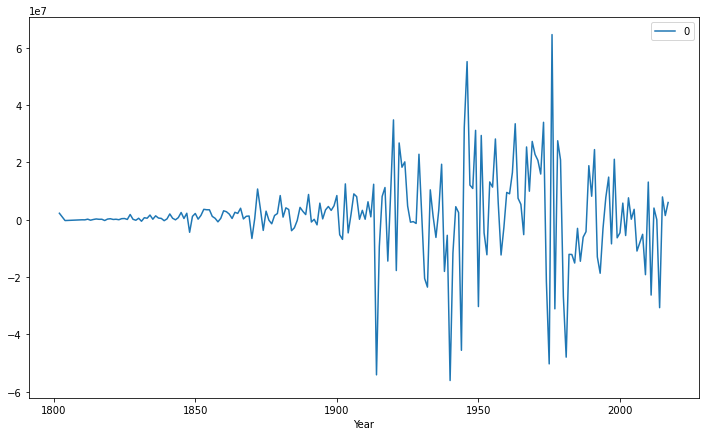

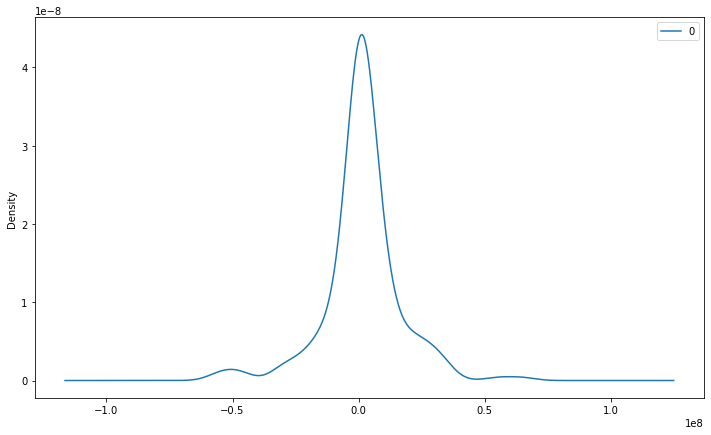

                  0
count  2.100000e+02
mean   1.515309e+06
std    1.505693e+07
min   -5.609871e+07
25%   -1.414534e+06
50%    7.956388e+05
75%    5.936372e+06
max    6.455757e+07


In [34]:
from matplotlib import pyplot
residuals = pd.DataFrame(res.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Prédiction

<AxesSubplot:xlabel='Year'>

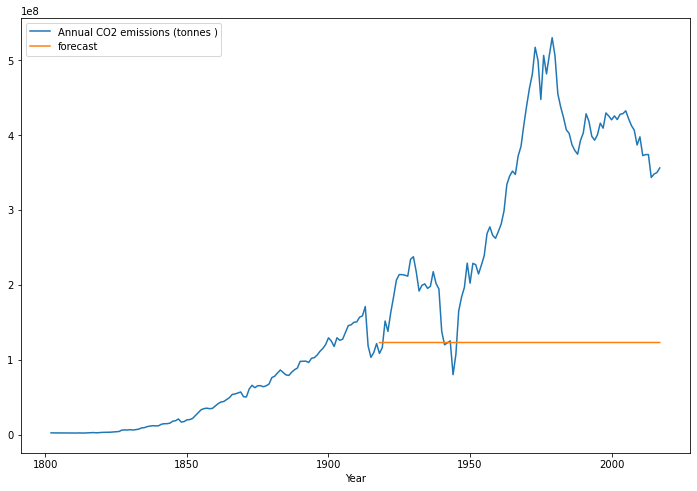

In [35]:
#fig, ax = plt.subplots()

#ax.plot(MA2_process)
#ax.set(xlabel='Number of Obs', ylabel='Y Value', title='Moving Average of order 2')
#ax.grid()

#plt.show()

#res.predict()

df['forecast']=res.predict(start=110,end=209,dynamic=True)
df[df.Code == 'FRA'][['Annual CO2 emissions (tonnes )','forecast']].plot(figsize=(12,8))

# SARIMAX

In [36]:
model=sm.tsa.statespace.SARIMAX(df[df.Code == 'FRA'][['Annual CO2 emissions (tonnes )']],order=(2, 1, 1),seasonal_order=(1,1,2,12))
results=model.fit()

C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Adrien\anaconda32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:          Annual CO2 emissions (tonnes )   No. Observations:                  210
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -3567.235
Date:                                 Wed, 01 Jun 2022   AIC                           7148.470
Time:                                         21:23:15   BIC                           7171.453
Sample:                                              0   HQIC                          7157.774
                                                 - 210                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7361      0.797      0.923      0.356      -0.826       2.299
ar.L2         -0.0023      0.163     -0.014      0.989      -0.321       0.317
ma.L1         -0.6493      0.786     -0.826      0.409      -2.190       0.892
ar.S.L12      -0.8874      2.236     -0.397      0.691      -5.270       3.495
ma.S.L12       0.0022      2.290      0.001      0.999      -4.487       4.491
ma.S.L24      -0.7509      2.026     -0.371      0.711      -4.722       3.220
sigma2       4.71e+14   4.97e-14   9.48e+27      0.000    4.71e+14    4.71e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               159.17
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              60.99   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.25e+43. Standard errors may be unstable.
"""

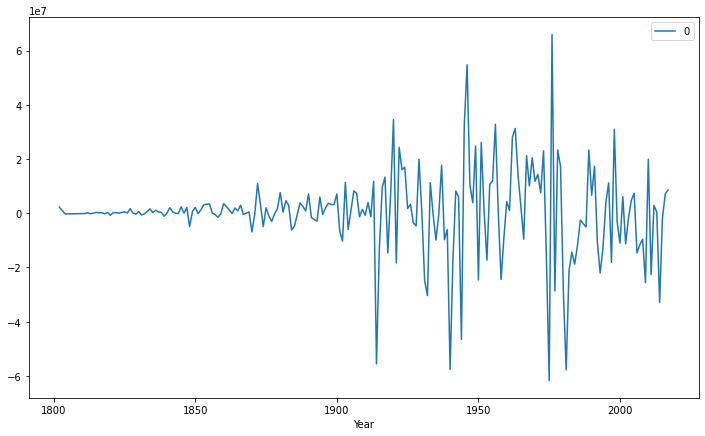

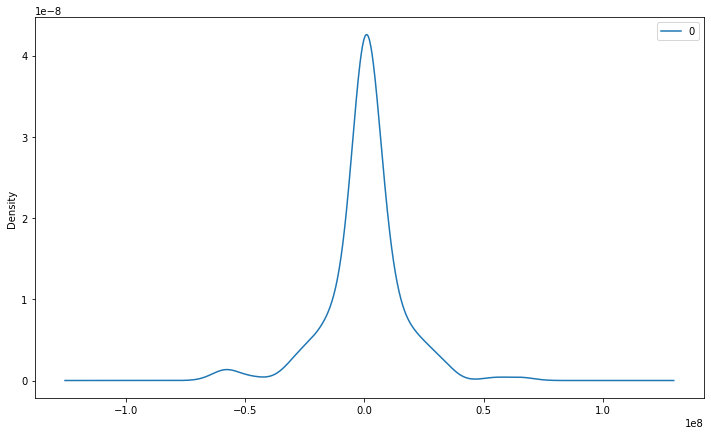

                  0
count  2.100000e+02
mean   2.633182e+05
std    1.558759e+07
min   -6.174074e+07
25%   -2.829089e+06
50%    3.594789e+05
75%    4.717433e+06
max    6.589901e+07


In [38]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

### Prédiction

<AxesSubplot:xlabel='Year'>

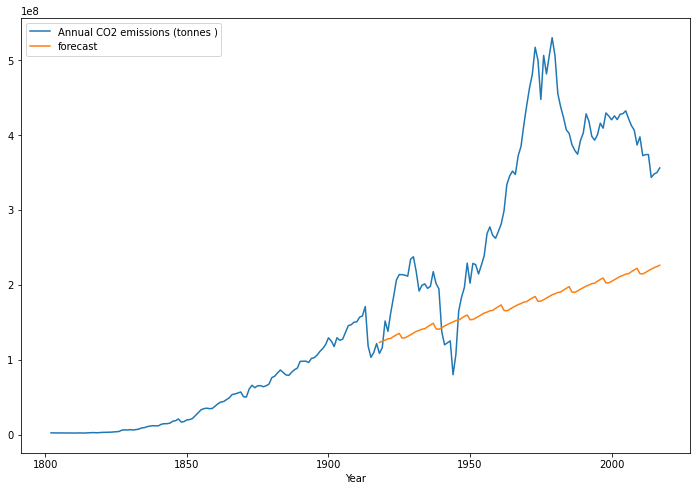

In [39]:
df['forecast']=results.predict(start=110,end=209,dynamic=True)
df[df.Code == 'FRA'][['Annual CO2 emissions (tonnes )','forecast']].plot(figsize=(12,8))

# GluonTS &amp; DeepAR

In [ ]:
#start = pd.Timestamp("2010",freq="Y")

In [40]:
train_set, test_set = train_test_split(df[df.Code == 'FRA']['Annual CO2 emissions (tonnes )'], test_size=0.2, random_state=42)

<ipython-input-72-2406298da5d8>:2: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  start = pd.Timestamp("2010", freq="Y")
C:\Users\Adrien\anaconda32\lib\site-packages\gluonts\transform\feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Adrien\anaconda32\lib\site-packages\gluonts\transform\feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base is None or self._freq_base == start.freq.base
C:\Users\Adrien\anaconda32\lib\site-packages\gluonts\transform\split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 100/100 [00:20<00:00,  4.88it/s, epoch=5/5, avg_epoch_loss=18.1]


-0.669548934962162


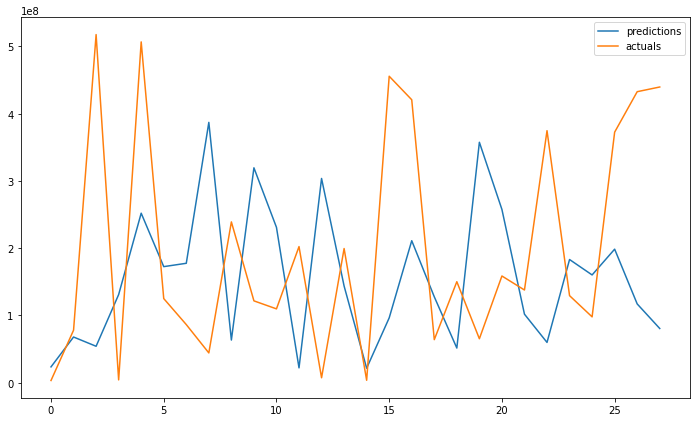

In [72]:
# Listing 20-2. Preparing the data format requered by the gluonts library
start = pd.Timestamp("2010", freq="Y")
# train dataset: cut the last window of length "prediction_length", add "target" and "start" fields
train_ds = ListDataset([{'target': train_set, 'start': start}], freq='Y')
# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset([{'target': test_set, 'start': start}],freq='Y')


# Listing 20-3. Fitting the default DeepAR model

np.random.seed(7)
mx.random.seed(7)

estimator = DeepAREstimator(
    prediction_length=28,
    context_length=100,
    freq="Y",
    trainer=Trainer(
                    epochs=5,
                    learning_rate=1e-2,
                    num_batches_per_epoch=100
                   )
)

predictor = estimator.train(train_ds)


# Listing 20-4. Prediction
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)


# Listing 20-5. R2 score and prediction graph
print(r2_score( list(test_ds)[0]['target'][-28:], predictions))

plt.plot(predictions)
plt.plot(list(test_ds)[0]['target'][-28:])
plt.legend(['predictions', 'actuals'])
plt.show()

**Evaluation forecast**

In [74]:
from gluonts.evaluation.backtest import make_evaluation_predictions


forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)



In [76]:
forecasts = list(forecast_it)
tss = list(ts_it)

C:\Users\Adrien\anaconda32\lib\site-packages\gluonts\transform\feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base is None or self._freq_base == start.freq.base
C:\Users\Adrien\anaconda32\lib\site-packages\gluonts\transform\split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)


In [95]:
idx = 0 #0 correspond a notre liste
ts_entry = tss[idx]
#ts_entry=tss
forecast_entry = forecasts[idx]

In [97]:
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")

Number of sample paths: 100
Dimension of samples: (100, 28)
Start date of the forecast window: 2024-12-31 00:00:00
Frequency of the time series: Y


In [99]:
print(f"Mean of the future window:\n {forecast_entry.mean}")
print(f"0.5-quantile (median) of the future window:\n {forecast_entry.quantile(0.5)}")

Mean of the future window:
 [3.01434820e+07 5.21093440e+07 3.31384380e+07 1.34550112e+08
 1.47072528e+08 1.04533288e+08 1.16418776e+08 1.37470496e+08
 9.85374800e+07 2.13878848e+08 1.09031912e+08 1.53082730e+07
 1.40902208e+08 4.75927960e+07 4.27013840e+07 3.22481280e+07
 3.50748280e+07 1.33299960e+08 6.95608960e+07 7.46252080e+07
 8.00260080e+07 1.27104952e+08 1.77281264e+08 1.25343920e+08
 7.14367840e+07 7.09654720e+07 8.72904000e+07 7.64304640e+07]
0.5-quantile (median) of the future window:
 [3.05166500e+07 5.15729880e+07 3.34946060e+07 1.35993584e+08
 1.48263584e+08 1.03510872e+08 1.14988208e+08 1.35646528e+08
 9.73102080e+07 2.14799344e+08 1.06081016e+08 1.39032810e+07
 1.44086352e+08 4.12965880e+07 3.83604320e+07 2.73710860e+07
 2.85567120e+07 1.31509896e+08 6.31386280e+07 7.08122880e+07
 6.79909440e+07 1.23345224e+08 1.71093200e+08 1.27693064e+08
 6.18776960e+07 6.00827360e+07 7.98454720e+07 6.28449640e+07]


**Visualisation des résultats**

In [100]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 100 
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

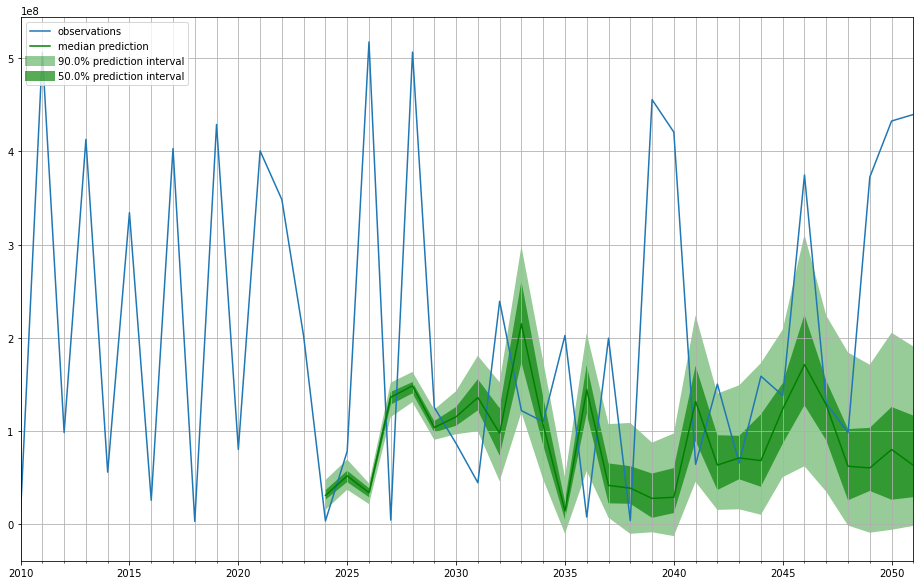

In [101]:
plot_prob_forecasts(ts_entry, forecast_entry)